Pregnancies : 임신 횟수 <br>
Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도<br>
BloodPressure : 이완기 혈압 (mm Hg)<br>
SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값<br>
Insulin : 2시간 혈청 인슐린 (mu U / ml)<br>
BMI : 체질량 지수 (체중kg / 키(m)^2)<br>
DiabetesPedigreeFunction : 당뇨병 혈통 기능<br>
Age : 나이<br>
Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.<br>

In [381]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [382]:
df = pd.read_csv("C:/Users/User/Desktop/data course/project python/data/diabetes.csv", encoding="cp949")

In [383]:
df.shape

(768, 9)

In [384]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Feature Engineering

### 수치형 변수를 범주형 변수로 만들기

In [386]:
df['Pregnancies_high'] = df['Pregnancies'] > 6 
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [387]:
# One-Hot-Encoding : 세 개 이상의 컬럼으로.
# 꼭 수치 데이터가 아니더라도 low, middel, high인 조건을 각각 걸어서 만들어줄 수 있음.
# 수치 -> 범주 -> 수치
# 마지막 범주 -> 수치에서 one - hot - encoding을 해준다.

df['Age_low'] = df['Age'] < 25
df['Age_middle'] = (df['Age'] >= 25) & (df['Age'] <= 60)
df['Age_high'] = df['Age'] > 60
df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


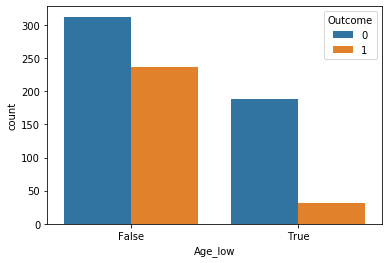

In [388]:
sns.countplot(data=df, x='Age_low', hue='Outcome')

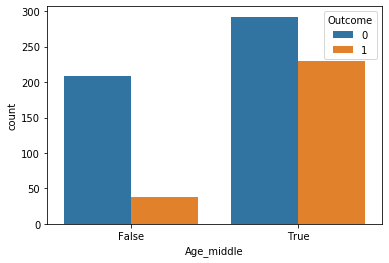

In [389]:
sns.countplot(data=df, x='Age_middle', hue='Outcome')

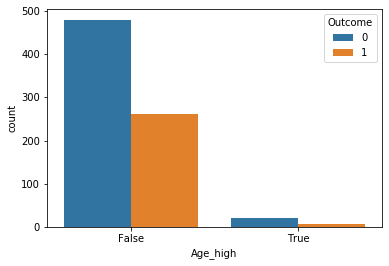

In [390]:
sns.countplot(data=df, x='Age_high', hue='Outcome')

### 결측치 다루기 - 평균으로 대체

In [391]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [392]:
# 최솟값에 0이 들어가는 애들이 있는데, 걔네들은 0이 나올 수 없는 값들이다.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [393]:
df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)
df[['Insulin','Insulin_nan']].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [394]:
df['Insulin_nan'].isnull().sum()

374

In [395]:
# 결측치 비율
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [396]:
# 결측치 처리 전후의 Outcome 평균 차이가 많이 난다.
# 머신러닝 알고리즘은 nan 가지고 계산을 할 수 없다.

df.groupby(['Outcome'])[['Insulin', 'Insulin_nan']].mean()

,Insulin,Insulin_nan
Outcome,,
0,68.792000,130.287879
1,100.335821,206.846154


In [397]:
df.groupby(['Outcome'])[['Insulin', 'Insulin_nan']].agg(['mean','median'])

Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [398]:
# 결측치 채우기 : 
# Outcome이 1이고 결측치인 값에 대해서는 Insulin_nan에서의 평균인 206으로,
# Outcome이 0이고 결측치인 값에 대해서는 Insulin_nan에서의 평균인 130으로 채워준다.

df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 206
df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 130

### 결측치 다루기 - 중앙값으로 대체

In [399]:
df.loc[(df['Outcome'] == 1) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 102.5
df.loc[(df['Outcome'] == 0) & (df['Insulin_nan'].isnull()), 'Insulin_nan'] = 169.5

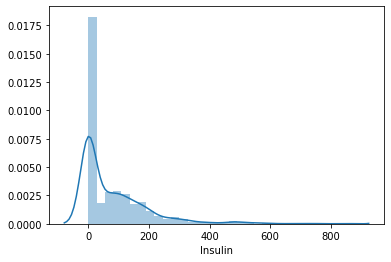

In [400]:
# 원래 데이터에서 한 쪽으로 치우쳐져있음.

sns.distplot(df['Insulin'])

### 왜도, 첨도 - 정규분포 만들기

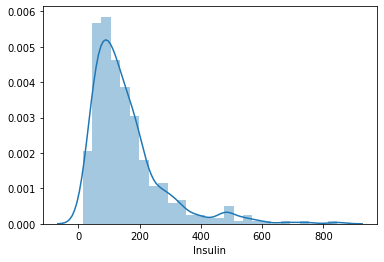

In [401]:
# 여전히 치우쳐져 있고 한 쪽으로 치우쳐짐 
sns.distplot(df.loc[df['Insulin'] > 0, "Insulin"]) # 인슐린의 값이 0보다 큰 데이터만

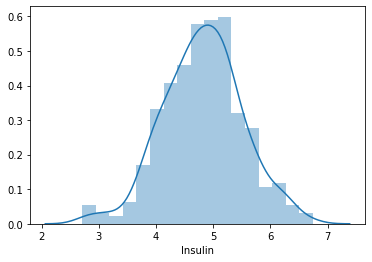

In [402]:
# log를 취하니까 조금 정규분포 형태 -> 더 좋은 성능을 낼 수 있다.
# log 값을 취할 떄는 1과 같은 작은 값을 더해주는데, 0 이하에서는 - 무한대 값으로 수렴하기 때문에 이를 방지하기 위함

sns.distplot(np.log(df.loc[df['Insulin'] > 0, "Insulin"] + 1))

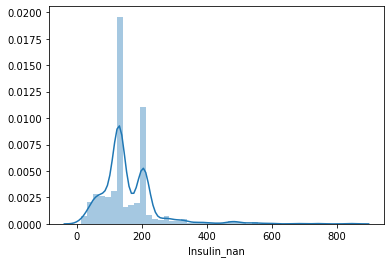

In [403]:
# 중앙값으로 채운 형태인데, 여기서 그래서 첨도가 두개 있다.
# 왼쪽으로 치우친 값.

sns.distplot(df['Insulin_nan'])

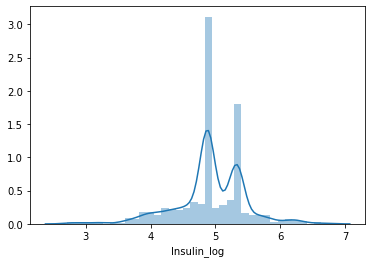

In [404]:
df['Insulin_log'] = np.log(df['Insulin_nan']+1)
sns.distplot(df['Insulin_log'])

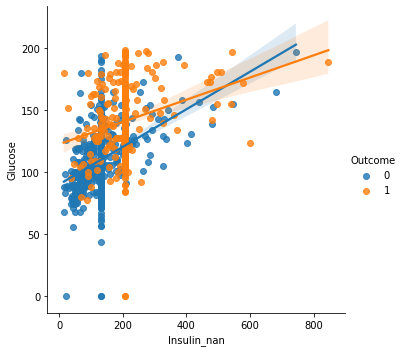

In [405]:
sns.lmplot(data=df, x='Insulin_nan', y='Glucose', hue='Outcome')

### 파생변수 생성

In [406]:
## EDA 62번 줄 확인
# 파생변수 생성 (상관분석을 통한 파생변수)

df['low_glu_insulin'] = (df['Glucose'] < 100) & (df['Insulin_nan'] <= 102.5)
df['low_glu_insulin'].head()

0    False
1    False
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [407]:
# corsstab : 범주형 값에 대해 crosstable 그려주는 것 (개수 세주는 것)
pd.crosstab(df['Outcome'], df['low_glu_insulin'])

# True에 해당하는 값은 Outcome 1 과 관련이 굉장히 낮다.

low_glu_insulin,False,True
Outcome,,
0,418,82
1,263,5


### 이상치 다루기

* 상자수염그림 : Q3보다 1.5IQR 초과하는 값, Q1보다 1.5IQR 미달하는 값을 이상치로

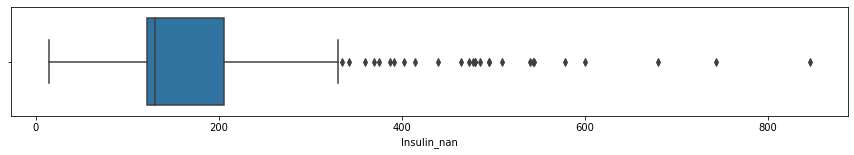

In [408]:
plt.figure(figsize=(15,2))
sns.boxplot(df['Insulin_nan'])

In [409]:
# 영상에서는 왜...... 25% = 50% 
df['Insulin_nan'].describe()

count    768.000000
mean     156.763021
std       88.802675
min       14.000000
25%      121.500000
50%      130.000000
75%      206.000000
max      846.000000
Name: Insulin_nan, dtype: float64

In [410]:
IQR3 = df['Insulin_nan'].quantile(q=0.75) 
IQR1 = df['Insulin_nan'].quantile(q=0.25)
IQR = IQR3 - IQR1
IQR

84.5

In [411]:
OUT = IQR3 + (IQR * 1.5)
OUT

332.75

In [412]:
df[df['Insulin_nan'] > OUT].shape

(27, 16)

In [413]:
df[df['Insulin_nan'] > 500].shape # boxplot에서 600 이후로 이상치들이 드물게 있었음.
# 얘를 아웃라이어로 한다. 3개로 27개보단 더 적음. -> train data set에서만 지우도록 한다.

(9, 16)

### Scaling

* 숫자 범위가 크게 차이 날 때 유용하게 사용됨

* 해당 예제 데이터에서는 EDA결과 scaling이 크게 필요하지 않아 생략하겠음.

In [414]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,206.0,5.332719,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,130.0,4.875197,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,206.0,5.332719,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [351]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['DiabetesPedigreeFunction','Glucose']])
scale = scaler.transform(df[['DiabetesPedigreeFunction','Glucose']])
scale

array([[ 0.46849198,  0.84832379],
       [-0.36506078, -1.12339636],
       [ 0.60439732,  1.94372388],
       ...,
       [-0.68519336,  0.00330087],
       [-0.37110101,  0.1597866 ],
       [-0.47378505, -0.8730192 ]])

In [352]:
# df[['DiabetesPedigreeFunction','Glucose']] = scale

In [353]:
# df[['DiabetesPedigreeFunction','Glucose']].head()

,DiabetesPedigreeFunction,Glucose
0,0.468492,0.848324
1,-0.365061,-1.123396
2,0.604397,1.943724
3,-0.920763,-0.998208
4,5.484909,0.504055


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000225F36B5188>,
      dtype=object)

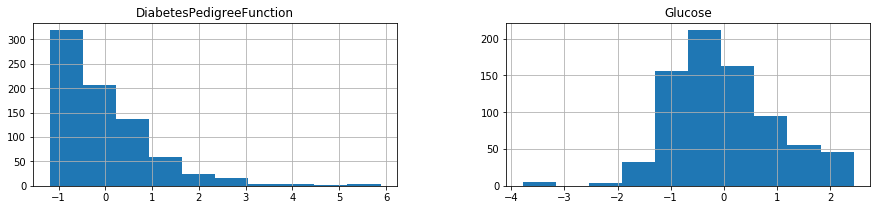

In [357]:
# df[['DiabetesPedigreeFunction','Glucose']].hist(figsize=(15,3))

## CSV 파일로 저장하기

In [419]:
# index = False ; 인덱스가 Unnamed:0으로 새로운 열로 형성되는 것을 방지
df.to_csv("C:/Users/User/Desktop/data course/project python/data/diabetes_feature.csv", index=False)

In [420]:
pd.read_csv("C:/Users/User/Desktop/data course/project python/data/diabetes_feature.csv", encoding='cp949').head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,206.0,5.332719,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,130.0,4.875197,False
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,206.0,5.332719,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


## 학습, 예측 데이터셋 나누기

In [358]:
# 정수만 표현하게 하기 위해 int하고 0.8은 전체 행 df.shape[0]-(행,열)에서 행의 숫자- 의 0.8만큼을 의미
split_count = int(df.shape[0]*0.8)
split_count

614

In [359]:
train = df[:split_count].copy() #613번까지 가지고 온다. 80% train set
train.shape

(614, 16)

In [360]:
# 앞에서 구해본 이상치가 모두 train data set에 있었음.

train[train['Insulin_nan']>600].shape

(3, 16)

In [361]:
train = train[train['Insulin_nan']<600]

In [362]:
test = df[split_count:].copy() # 20% test set
test.shape

(154, 16)

## 학습, 예측에 사용할 컬럼

In [363]:
feature_names = train.columns.tolist() # 여러 개의 값을 가져오므로 list값으로 만들어 줌.
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

## 정답값이자 예측해야 될 값

In [364]:
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [365]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,0.848324,72,35,33.6,0.468492,50,False,206.0,False
1,-1.123396,66,29,26.6,-0.365061,31,False,130.0,False
2,1.943724,64,0,23.3,0.604397,32,True,206.0,False
3,-0.998208,66,23,28.1,-0.920763,21,False,94.0,True
4,0.504055,40,35,43.1,5.484909,33,False,168.0,False


In [366]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [367]:
# 예측에 사용할 데이터셋

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,130.0,False
616,-0.121888,96,0,28.7,-0.950964,30,False,130.0,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,206.0,False


In [368]:
# 실제로는 예측의 정답값을 알 수 없지만, 여기서는 데이터셋이 있어서 알 수 있기 때문에
# 실제로 예측 들어가기 전에 한 번 테스트 해본다.

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

## 머신러닝 알고리즘 가져오기

In [369]:
from sklearn.tree import DecisionTreeClassifier # 당뇨병인지 아닌지 예측 ; 분류 ; classifier

model = DecisionTreeClassifier() #random_state : 예측 결과? 고정
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 학습(훈련)

In [370]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 예측

In [371]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

## 트리 알고리즘 분석하기

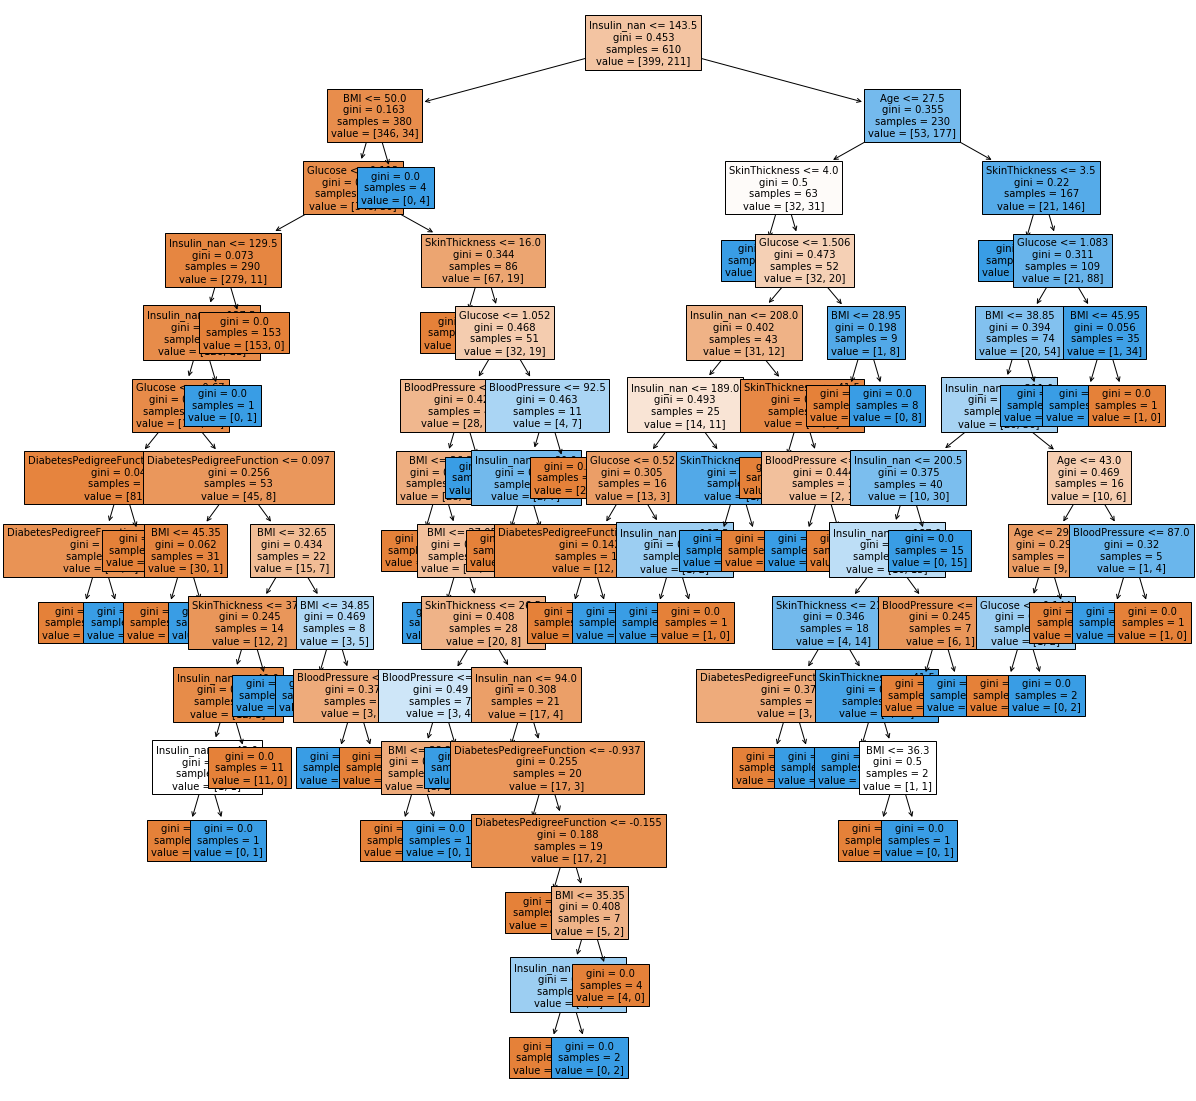

In [372]:
from sklearn.tree import plot_tree

# tree 변수 지정해주면 그림으로 나온다.

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names = feature_names, filled=True, fontsize=10)

# 가장 좋은 조건이 위에 있음 = Glucose -> feature importance에서 확인할 수 있음.

In [373]:
# 피처의 중요도를 추출하기

model.feature_importances_

array([0.06802191, 0.04390526, 0.08915815, 0.10065232, 0.04201215,
       0.06495665, 0.        , 0.59129356, 0.        ])

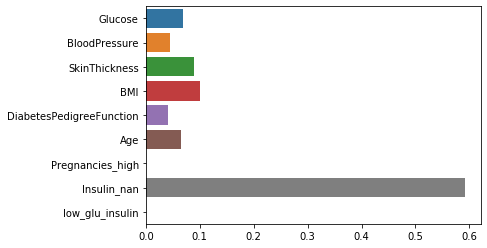

In [374]:
# 피처의 중요도 시각화 하기
# Pregnancies_high 가 학습에서 그렇게 중요하지 않았다.
# low, high는 모수가 적어서 그렇지만, middle이 중요한 역할을 한다.

sns.barplot(x=model.feature_importances_, y=feature_names)

## 정확도(Accuracy) 측정하기

In [375]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 된다.
# 여기에서 절댓값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.
# 44 => 39 => 49(나이 25 기준) => 55(나이 30기준) => 23(인슐린 결측치를 평균으로대체) => 25(인슐린 결측치를 중앙값으로 대체,log 해줘도)
#     => 23(이상치 제거)
#     => 20(scaling)

# 몇퍼센트를 잘못 예측했는가?
#   : abs(y_test - y_predict).sum() / len(y_test)
diff_count = abs(y_test - y_predict).sum()
diff_count

20

In [377]:
# 예측의 정확도를 구한다.
# 정확도는 오히려 떨어졌음. 꼭 성능을 올려준다는 보장을 할 수는 없다.
# 71 => => 85(인슐린 결측치를 평균으로 대체) => 89(중앙값) => 83(파생변수) => 85(이상치 제거)
#    => 87 (scaling)
( (len(y_test) - diff_count) / len(y_test) ) * 100

87.01298701298701

In [378]:
from sklearn.metrics import accuracy_score

In [379]:
accuracy_score(y_test, y_predict) * 100

87.01298701298701

In [380]:
# 정답값을 알고 있을 때만 구할 수 있다.

model.score(X_test, y_test) * 100

87.01298701298701

* Age 값에 대해 전처리를 해줬는데 오히려 더 성능이 안좋게 나온 이유

당뇨병 발병률은 30세가 넘어가면 확실히 발병률이 높아지긴 하지만 60세가 넘어가면 별로 차이가 없어진다.
범주화 해주는게 성능을 올릴 수도 있지만 내려가기도 함을 알 수 있다.
feature engineering 무조건 성능 향상은 아님. 직접 적용해서 분석하는 과정 필요.

* Pregnancies를 범주화했을 때는 성능이 올라갔고

* Age를 범주화했을 때는 성능이 낮아졌다. - 25세 기준

* 30세를 기준으로 다시 했을 때도 오히려 더 낮아졌다.

* 결측치 처리를 Insulin_nan 해줬더니 트리에서 Insulin이 가장 중요하게 나타났다. 성능도 오히려 더 좋아졌다.

* 또한, 전처리에서 왜도가 치우쳐져ㅓ 있을 때 log 값 취해주면 정규분포에 가까워지면서 모델의 성능을 좀 더 개선해 볼 수 있다.

* 파생변수 만들었을 때 25개.... 성능 그닥. 영상과 데이터셋이 약간 다른 것 같음. 머신러닝 알고리즘은 아무것도 모르는 백지상태와 같기 때문에 우리가 넣어준 데이터 그대로 학습한다. 파생변수로 만드는 것은 머신러닝 알고리즘이 할 수 없기 때문에 우리가 알려줘야 한다.

* 이상치 제거해줬을 때 성능이 향상됨. (600기준으로 했는데 500으로 바꿔도 됨.) -> 500으로 해도 큰 변화는 없음

* scaling 했더니 더 정확해짐